In [1]:
import sys

if "/Users/shvimas/GitHub/diploma/src" not in sys.path:
    sys.path.append("/Users/shvimas/GitHub/diploma/src")

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [18]:
%matplotlib inline
from tqdm import tqdm_notebook
from importlib import reload
import matplotlib.pyplot as pl
import data_helpers as dh
import ls_pricing as ls
from pars_range import Range, ParsRange
import numpy as np

pl.rcParams["figure.figsize"] = (15, 10)
pl.rcParams["figure.figsize"] = (15, 10)
pl.style.use('ggplot')

In [4]:
try:
    data, info = dh.read_data("../SPH2_031612.csv")
except FileNotFoundError:
    data, info = dh.read_data("SPH2_031612.csv")

In [5]:
# q == r
def get_rate(c, p, k, s):
    return np.log((c - p) / (k - s)) / t

In [6]:
day = 0
t = info[day].mat
strikes_call = data.strikes[True][day]
strikes_put = data.strikes[False][day]
common_strikes = np.array(list(set(strikes_call) & set(strikes_put)))
common_strikes.sort()
inx_call = np.array([False] * len(strikes_call))
inx_put = np.array([False] * len(strikes_put))
for inx, strike in enumerate(strikes_call):
    inx_call[inx] = strike in common_strikes
for inx, strike in enumerate(strikes_put):
    inx_put[inx] = strike in common_strikes
common_strikes

array([ 1010.,  1020.,  1025.,  1030.,  1040.,  1050.,  1060.,  1070.,
        1075.,  1080.,  1090.,  1100.,  1110.,  1120.,  1125.,  1130.,
        1140.,  1150.,  1160.,  1170.,  1175.,  1180.,  1190.,  1200.,
        1210.,  1220.,  1225.,  1230.,  1240.,  1250.,  1260.,  1270.,
        1275.,  1280.,  1290.,  1300.,  1310.,  1320.,  1325.,  1330.,
        1340.,  1350.,  1360.,  1370.,  1375.,  1380.,  1390.,  1400.,
        1410.,  1420.,  1425.,  1430.,  1440.,  1450.,  1460.,  1470.,
        1475.,  1480.,  1490.,  1500.,  1510.])

In [42]:
c = data.prices[True][day][inx_call]
p = data.prices[False][day][inx_put]
k = common_strikes
s = info[day].spot

In [43]:
get_rate(c, p, k, s)

/Users/shvimas/miniconda3/envs/default/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan])

In [10]:
from scipy.optimize import differential_evolution
from sklearn.metrics import mean_absolute_error, mean_squared_error


def parity(r, q): return c - p + k * np.exp(-r * t) - s * np.exp(-q * t)
def opt_func(pars): return mean_absolute_error(np.zeros(len(c)), parity(*pars))
differential_evolution(lambda pars: opt_func(pars), bounds=((0, 1), (0, 1)))

     fun: 0.038823953672243852
     jac: array([ 15.69529134,  15.2241496 ])
 message: 'Optimization terminated successfully.'
    nfev: 1158
     nit: 32
 success: True
       x: array([ 0.00801071,  0.0080215 ])

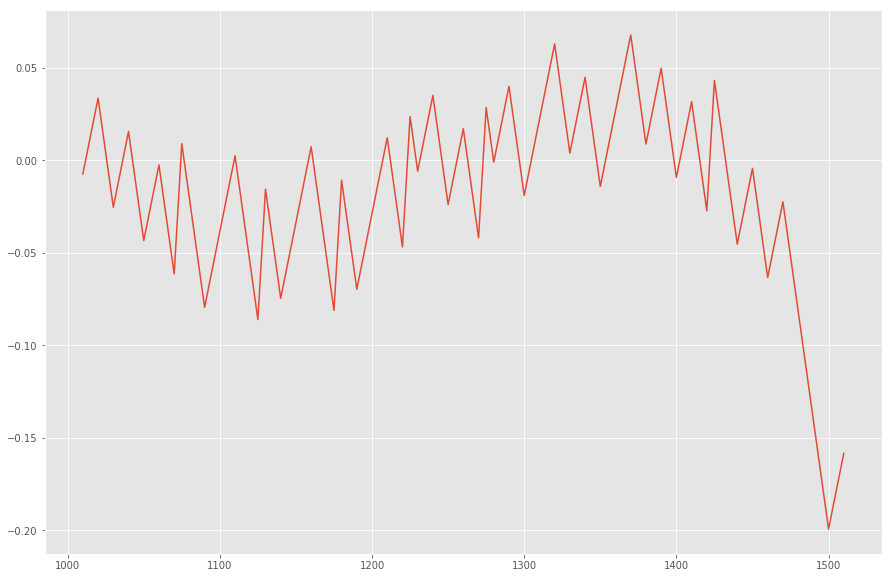

In [80]:
r = .0041
q = .0041

pl.plot(k, parity(r, q))

In [11]:
results = []
for day in tqdm_notebook(range(len(info))):
    t = info[day].mat
    strikes_call = data.strikes[True][day]
    strikes_put = data.strikes[False][day]
    common_strikes = np.array(list(set(strikes_call) & set(strikes_put)))
    common_strikes.sort()
    inx_call = np.array([False] * len(strikes_call))
    inx_put = np.array([False] * len(strikes_put))
    for inx, strike in enumerate(strikes_call):
        inx_call[inx] = strike in common_strikes
    for inx, strike in enumerate(strikes_put):
        inx_put[inx] = strike in common_strikes
    c = data.prices[True][day][inx_call]
    p = data.prices[False][day][inx_put]
    k = common_strikes
    s = info[day].spot
    
    def parity(r, q): return c - p + k * np.exp(-r * t) - s * np.exp(-q * t)
    def opt_func(pars): return mean_absolute_error(np.zeros(len(c)), parity(*pars))
    results.append(differential_evolution(lambda pars: opt_func(pars), bounds=((0, 1), (0, 1))))


HBox(children=(IntProgress(value=0, max=187), HTML(value='')))

HBox(children=(IntProgress(value=0, max=187), HTML(value='')))

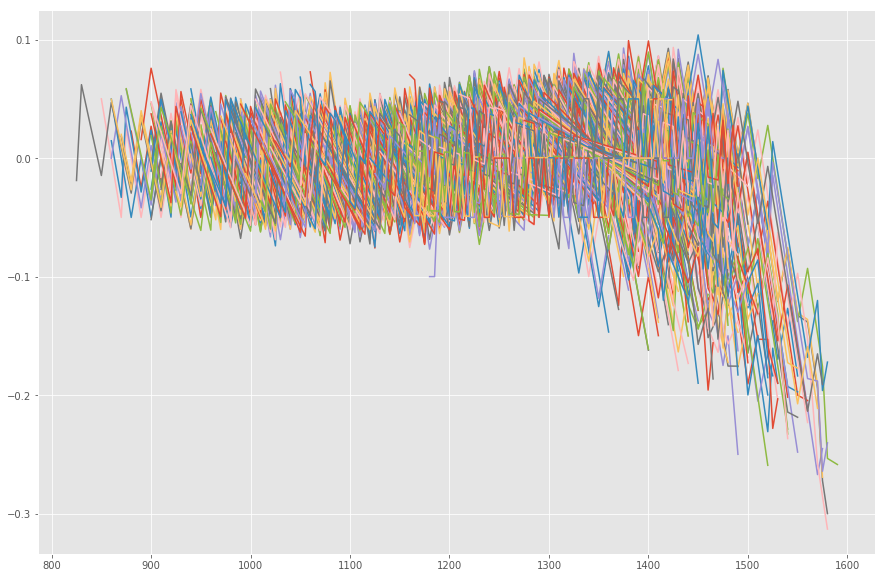

In [23]:
pl.figure()
for day in tqdm_notebook(range(len(info))):
    t = info[day].mat
    strikes_call = data.strikes[True][day]
    strikes_put = data.strikes[False][day]
    common_strikes = np.array(list(set(strikes_call) & set(strikes_put)))
    common_strikes.sort()
    inx_call = np.array([False] * len(strikes_call))
    inx_put = np.array([False] * len(strikes_put))
    for inx, strike in enumerate(strikes_call):
        inx_call[inx] = strike in common_strikes
    for inx, strike in enumerate(strikes_put):
        inx_put[inx] = strike in common_strikes
    c = data.prices[True][day][inx_call]
    p = data.prices[False][day][inx_put]
    k = common_strikes
    s = info[day].spot
    def parity(r, q): return c - p + k * np.exp(-r * t) - s * np.exp(-q * t)
    def opt_func(pars): return mean_absolute_error(np.zeros(len(c)), parity(*pars))
    res = differential_evolution(func=opt_func, bounds=((0, .1), (0, .1)))
    pl.plot(k, parity(*res.x))

In [16]:
x

array([  8.01151028e-03,   8.02238244e-03,   8.02036365e-03,
         8.02584572e-03,   8.07795186e-03,   8.09895749e-03,
         8.06131466e-03,   8.07301812e-03,   8.08931710e-03,
         8.10750755e-03,   8.03489978e-03,   8.04773780e-03,
         8.04120189e-03,   8.05485934e-03,   8.01371781e-03,
         8.02367365e-03,   8.00173969e-03,   8.01784223e-03,
         7.95109906e-03,   7.96782653e-03,   8.02105954e-03,
         8.04017626e-03,   7.98320482e-03,   8.00071705e-03,
         7.99717699e-03,   8.01254828e-03,   8.02397822e-03,
         8.03844007e-03,   8.04618620e-03,   8.06864877e-03,
         8.05246862e-03,   8.07404664e-03,   8.10554377e-03,
         8.12084971e-03,   8.07980374e-03,   8.09677414e-03,
         8.14837837e-03,   8.16572031e-03,   8.09420518e-03,
         8.11122131e-03,   8.11185272e-03,   8.12503350e-03,
         8.13203305e-03,   8.14569780e-03,   7.97881376e-03,
         8.00131045e-03,   8.02156594e-03,   8.03732886e-03,
         8.02174832e-03,

In [84]:
lambda x: print(1); print(x ** 2); print(2)

NameError: name 'x' is not defined

In [8]:
t * 365

270.0

In [13]:
np.array()

TypeError: Required argument 'object' (pos 1) not found

In [21]:
np.exp(0.008) - 1

0.0080320855042734784